In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.multioutput import MultiOutputRegressor
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from numpy.typing import NDArray
from scipy.optimize import minimize
from typing import List, Tuple
import time as time
import pandas as pd


In [2]:
# result_10_250 = pd.read_csv('result_10_250.csv')を読み込む
result_10_250 = pd.read_csv("result_10_250.csv")

# result_10_250のデータを表示
print(result_10_250)


    Unnamed: 0   SO        PO   True PO        CV       EBZ  True EBZ  \
0            0  1.0  1.009021  0.958842  0.730269  0.989190  0.968200   
1            1  1.0  1.124731  0.939955  0.655077  1.042393  0.940734   
2            2  1.0  1.114703  0.879274  0.681093  1.051754  0.892321   
3            3  1.0  1.233484  0.925198  1.010556  1.167511  0.955377   
4            4  1.0  1.186111  0.728494  1.021136  1.166859  0.722000   
..         ...  ...       ...       ...       ...       ...       ...   
95          95  1.0  1.311464  0.768169  1.132604  1.273183  0.858135   
96          96  1.0  1.212948  0.851724  0.964061  1.144929  0.904885   
97          97  1.0  1.090486  0.909553  0.522908  1.031562  0.937256   
98          98  1.0  1.060633  0.961569  0.791406  1.042343  0.960321   
99          99  1.0  1.133730  0.930767  0.849216  1.084748  0.927418   

      CV EBZ       EBP  True EBP    CV EBP      EBPA  True EBPA   CV EBPA  \
0   0.989989  0.989190  0.968200  0.989989  0.

In [3]:
# result_10_250のデータのカラム名を表示
print(result_10_250.columns)


Index(['Unnamed: 0', 'SO', 'PO', 'True PO', 'CV', 'EBZ', 'True EBZ', 'CV EBZ',
       'EBP', 'True EBP', 'CV EBP', 'EBPA', 'True EBPA', 'CV EBPA', 'EBPA2',
       'True EBPA2', 'CV EBPA2'],
      dtype='object')


In [4]:
# SO', 'PO', 'True PO', 'CV', 'EBZ', 'True EBZ', 'CV EBZ',を取り出す
result_10_250 = result_10_250[["SO", "PO", "True PO", "CV", "EBZ", "True EBZ", "CV EBZ"]]


In [5]:
# result_10_250のデータを表示
print(result_10_250)


     SO        PO   True PO        CV       EBZ  True EBZ    CV EBZ
0   1.0  1.009021  0.958842  0.730269  0.989190  0.968200  0.989989
1   1.0  1.124731  0.939955  0.655077  1.042393  0.940734  1.024271
2   1.0  1.114703  0.879274  0.681093  1.051754  0.892321  0.994157
3   1.0  1.233484  0.925198  1.010556  1.167511  0.955377  1.108322
4   1.0  1.186111  0.728494  1.021136  1.166859  0.722000  1.146664
..  ...       ...       ...       ...       ...       ...       ...
95  1.0  1.311464  0.768169  1.132604  1.273183  0.858135  1.208139
96  1.0  1.212948  0.851724  0.964061  1.144929  0.904885  1.178584
97  1.0  1.090486  0.909553  0.522908  1.031562  0.937256  1.008903
98  1.0  1.060633  0.961569  0.791406  1.042343  0.960321  1.010588
99  1.0  1.133730  0.930767  0.849216  1.084748  0.927418  1.095378

[100 rows x 7 columns]


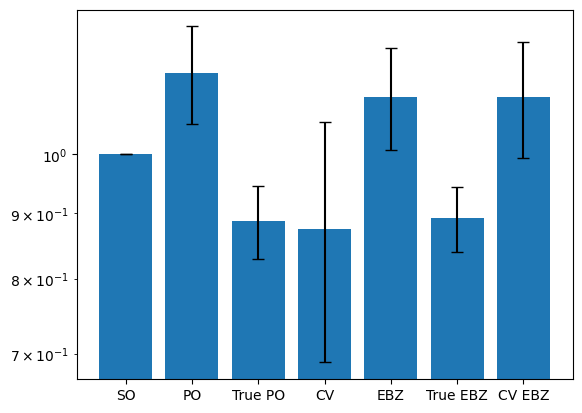

In [8]:
# 各列の平均とエラーバーを取得
mean = result_10_250.mean()
std = result_10_250.std()

# 平均とエラーバーを棒グラフで表示
plt.bar(mean.index, mean, yerr=std, capsize=4)
plt.yscale("log")
plt.show()
